In [1]:
import os.path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV
import statsmodels.formula.api as smf

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
DATA_DIR = os.path.join("nba_FINALDATA.csv")
nba_df = pd.read_csv(DATA_DIR)
nba_df.head(1)

,Unnamed: 0,name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS_Game,salary,playoff
0,0,Alex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,...,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,5725000.0,1


In [4]:
#drop Unnamed column
nba_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# I need to first confirm the assumption of homoscedasticity is True

[Text(0,0.5,'frequency'),
 Text(0.5,0,'salary'),
 Text(0.5,1,'Distribution of Salary')]

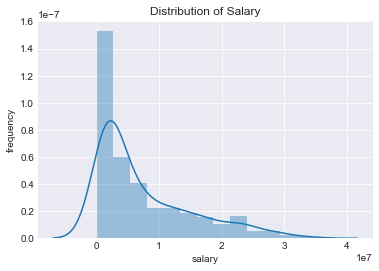

In [42]:
#we want our Y to have as close as a normal distribution: 
y = nba_df.salary
ax = sns.distplot(y);
ax.set(xlabel='salary', ylabel='frequency', title='Distribution of Salary')

[Text(0,0.5,'frequency'),
 Text(0.5,0,'log(salary)'),
 Text(0.5,1,'Distribution of log(Salary)')]

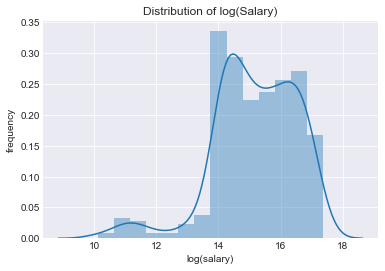

In [44]:
#lets try log(y)
a= sns.distplot(np.log(y))
a.set(xlabel='log(salary)', ylabel='frequency', title='Distribution of log(Salary)')

[Text(0,0.5,'frequency'),
 Text(0.5,0,'sqrt(salary)'),
 Text(0.5,1,'Distribution of sqrt(Salary)')]

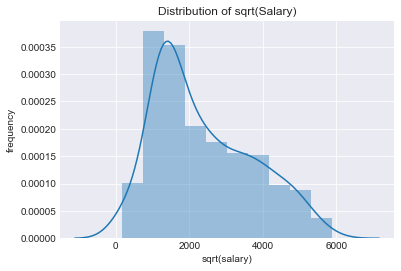

In [45]:
#lets try sqrt(y)
b = sns.distplot(np.sqrt(y))
b.set(xlabel='sqrt(salary)', ylabel='frequency', title='Distribution of sqrt(Salary)')

**I am going to fit a model with one variable (the one thats most correlated with salary) - points scored per game**

**salary as y**

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


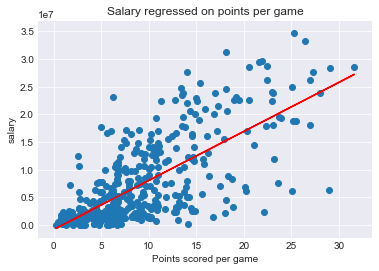

In [46]:
#Define the model

lr = smf.ols('salary ~ PS_Game', data=nba_df)

# Fit the model
fit1 = lr.fit()

#plot the salary data and the regression line through it - see how even the distribution is 
x = nba_df.PS_Game
y = nba_df.salary


fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(nba_df.PS_Game, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
ax.set(xlabel='Points scored per game', ylabel='salary', title = 'Salary regressed on points per game')

fig.show()

Text(0,0.5,'Residuals')

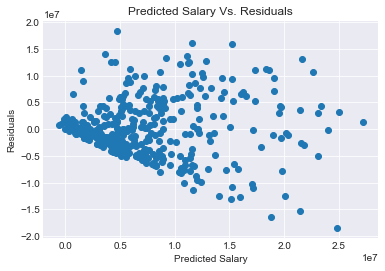

In [9]:
#plot a graph where x = y_pred and y = residuals 
y_pred = fit1.predict(nba_df.PS_Game)
residuals = nba_df.salary - y_pred
plt.scatter(y_pred, residuals)

plt.title("Predicted Salary Vs. Residuals")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")

Heteroskedasticity!  
Here we can see that as you predict higher values of salary, the variance of the error is larger

**salary as sqrt(y)**

In [15]:
nba_df['sqrty'] = np.sqrt(nba_df.salary)

lr1 = smf.ols('sqrty ~ PS_Game', data=nba_df)

# Fit the model
fit2 = lr1.fit()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[Text(0,0.5,'sqrt(salary)'),
 Text(0.5,0,'Points scored per game'),
 Text(0.5,1,'Sqrt(salary) regressed on points per game')]

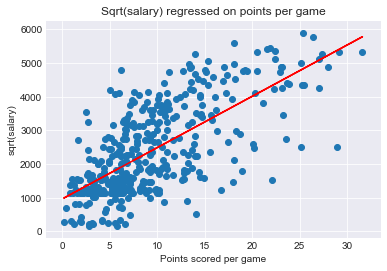

In [47]:
x = nba_df.PS_Game
y = nba_df.sqrty


fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(nba_df.PS_Game, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()
ax.set(xlabel='Points scored per game', ylabel='sqrt(salary)', title = 'Sqrt(salary) regressed on points per game')

Text(0,0.5,'Residuals')

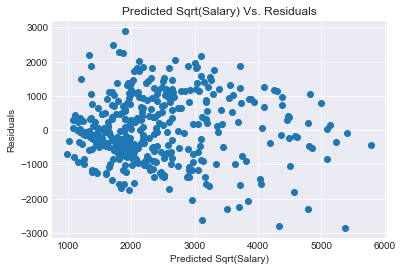

In [48]:
y_pred = fit2.predict(nba_df.PS_Game)
residuals = nba_df.sqrty - y_pred
plt.scatter(y_pred, residuals)

plt.title("Predicted Sqrt(Salary) Vs. Residuals")
plt.xlabel("Predicted Sqrt(Salary)")
plt.ylabel("Residuals")

Much better with sqrt(y)!



**salary as log(y)**

In [49]:
nba_df['logy'] = np.log(nba_df.salary)
# Define the model
lr1 = smf.ols('logy ~ PS_Game', data=nba_df)

# Fit the model
fit3 = lr1.fit()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


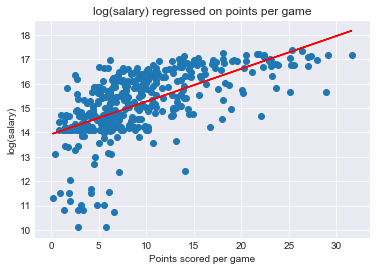

In [50]:
x = nba_df.PS_Game
y = nba_df.logy


fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(nba_df.PS_Game, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
ax.set(xlabel='Points scored per game', ylabel='log(salary)', title = 'log(salary) regressed on points per game')

fig.show()

Text(0,0.5,'Residuals')

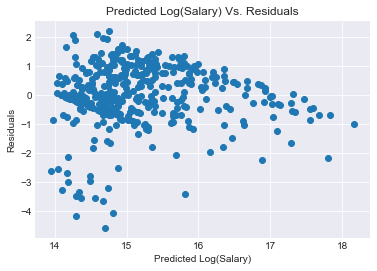

In [20]:
y_pred = fit3.predict(nba_df.PS_Game)
residuals = nba_df.logy - y_pred
plt.scatter(y_pred, residuals)

plt.title("Predicted Log(Salary) Vs. Residuals")
plt.xlabel("Predicted Log(Salary)")
plt.ylabel("Residuals")

even worse!

**I am going to use sqrt(y) as my Y variable.**

In [21]:
#remove the log(y) column
nba_df.drop(['logy'], axis=1, inplace=True)

In [23]:
nba_df.head(1)

,name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG_Per,...,TRB,AST,STL,BLK,TOV,PF,PS_Game,salary,playoff,sqrty
0,Alex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,0.393,...,1.3,0.6,0.5,0.1,0.5,1.7,6.0,5725000.0,1,2392.697223


In [24]:
#save my dataset as a csv file 
nba_df.to_csv('nba_FINALDATA_ytransform.csv', sep=',')

# EDA!

**correlation heatmap** - this will show us the strength of each correlation

In [25]:
pd.set_option('display.max_columns', 1000)
nba_df.corr()

,Age,G,GS,MP,FG,FGA,FG_Per,threeP,threePA,threeP_Perc,twoP,twoPA,twoP_Per,eFG_Per,FT,FTA,FT_Per,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS_Game,salary,playoff,sqrty
Age,1.000000,0.135412,0.069184,0.159349,0.076940,0.081528,0.052706,0.167117,0.143119,0.089174,0.018343,0.023201,0.032727,0.141751,0.039175,0.024932,0.161858,-0.010198,0.116593,0.082877,0.156274,0.117137,-0.051757,0.075955,0.054183,0.085446,0.225477,0.124678,0.251121
G,0.135412,1.000000,0.538778,0.605298,0.484927,0.471669,0.206342,0.336229,0.345445,0.231989,0.431321,0.414549,0.209206,0.295227,0.340643,0.353371,0.278045,0.271787,0.445317,0.414393,0.298532,0.433713,0.260755,0.373557,0.497427,0.469655,0.401703,0.081375,0.473483
GS,0.069184,0.538778,1.000000,0.807034,0.733560,0.709556,0.207207,0.412014,0.411234,0.131032,0.694223,0.686668,0.158734,0.216411,0.600239,0.620630,0.161724,0.439516,0.642089,0.612675,0.477877,0.596854,0.407822,0.606136,0.589894,0.718484,0.658870,0.020017,0.664982
MP,0.159349,0.605298,0.807034,1.000000,0.867354,0.873905,0.173601,0.609398,0.619819,0.288664,0.769750,0.780530,0.169398,0.262736,0.691697,0.700999,0.280572,0.349670,0.673993,0.607867,0.623190,0.741250,0.348451,0.735079,0.668983,0.860560,0.675637,-0.050899,0.707355
FG,0.076940,0.484927,0.733560,0.867354,1.000000,0.978667,0.242951,0.582567,0.583165,0.247892,0.937457,0.938115,0.200667,0.269321,0.839973,0.842429,0.275840,0.357176,0.657374,0.597812,0.622185,0.614076,0.366711,0.801024,0.543206,0.986621,0.699871,-0.020324,0.694876
FGA,0.081528,0.471669,0.709556,0.873905,0.978667,1.000000,0.084557,0.670570,0.683859,0.318194,0.874771,0.907924,0.071033,0.152899,0.838264,0.823116,0.328938,0.233746,0.585771,0.505805,0.666881,0.634703,0.265068,0.817222,0.502148,0.982478,0.674635,-0.039175,0.673155
FG_Per,0.052706,0.206342,0.207207,0.173601,0.242951,0.084557,1.000000,-0.199811,-0.254477,-0.168599,0.374133,0.256156,0.848014,0.875862,0.136397,0.203666,-0.186465,0.543929,0.379348,0.452783,-0.044022,0.068131,0.438566,0.104774,0.334934,0.179613,0.198858,0.057203,0.212175
threeP,0.167117,0.336229,0.412014,0.609398,0.582567,0.670570,-0.199811,1.000000,0.987673,0.578054,0.264000,0.304929,-0.101628,0.158189,0.466116,0.397494,0.380936,-0.254478,0.154455,0.032929,0.478838,0.447501,-0.124828,0.462172,0.192647,0.652912,0.431831,0.033669,0.434234
threePA,0.143119,0.345445,0.411234,0.619819,0.583165,0.683859,-0.254477,0.987673,1.000000,0.558963,0.269734,0.315247,-0.111017,0.092498,0.483723,0.414930,0.392949,-0.266729,0.161798,0.034336,0.500121,0.466904,-0.129388,0.486589,0.198187,0.656251,0.421889,0.015692,0.423322
threeP_Perc,0.089174,0.231989,0.131032,0.288664,0.247892,0.318194,-0.168599,0.578054,0.558963,1.000000,0.046689,0.093330,-0.125238,0.191896,0.162445,0.100967,0.293871,-0.355525,-0.055349,-0.154200,0.270417,0.219173,-0.212150,0.172887,-0.029668,0.288283,0.081876,0.023648,0.082663


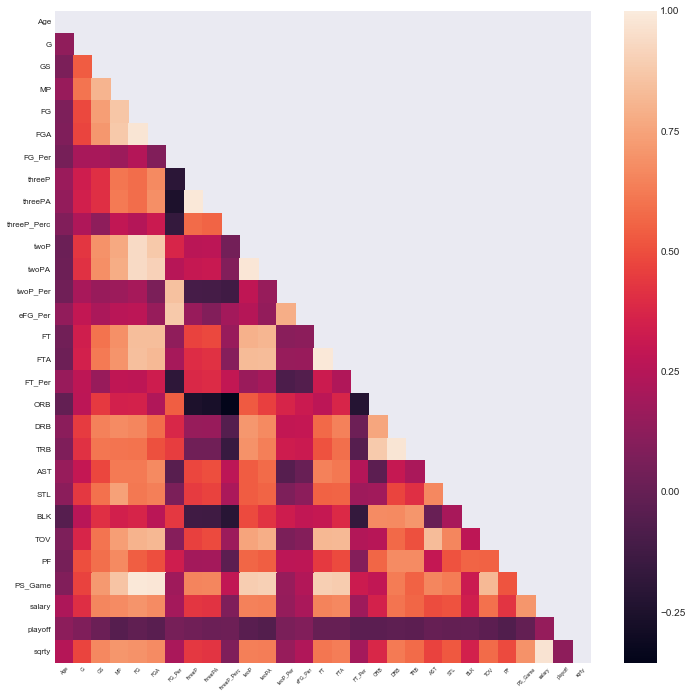

In [26]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=False)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=45)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(nba_df)

- The light spaces represent high multicollinearity 
- Note how the negative correlation goes to -0.25 --> this shows that very few variables are negatively correlated with one another 

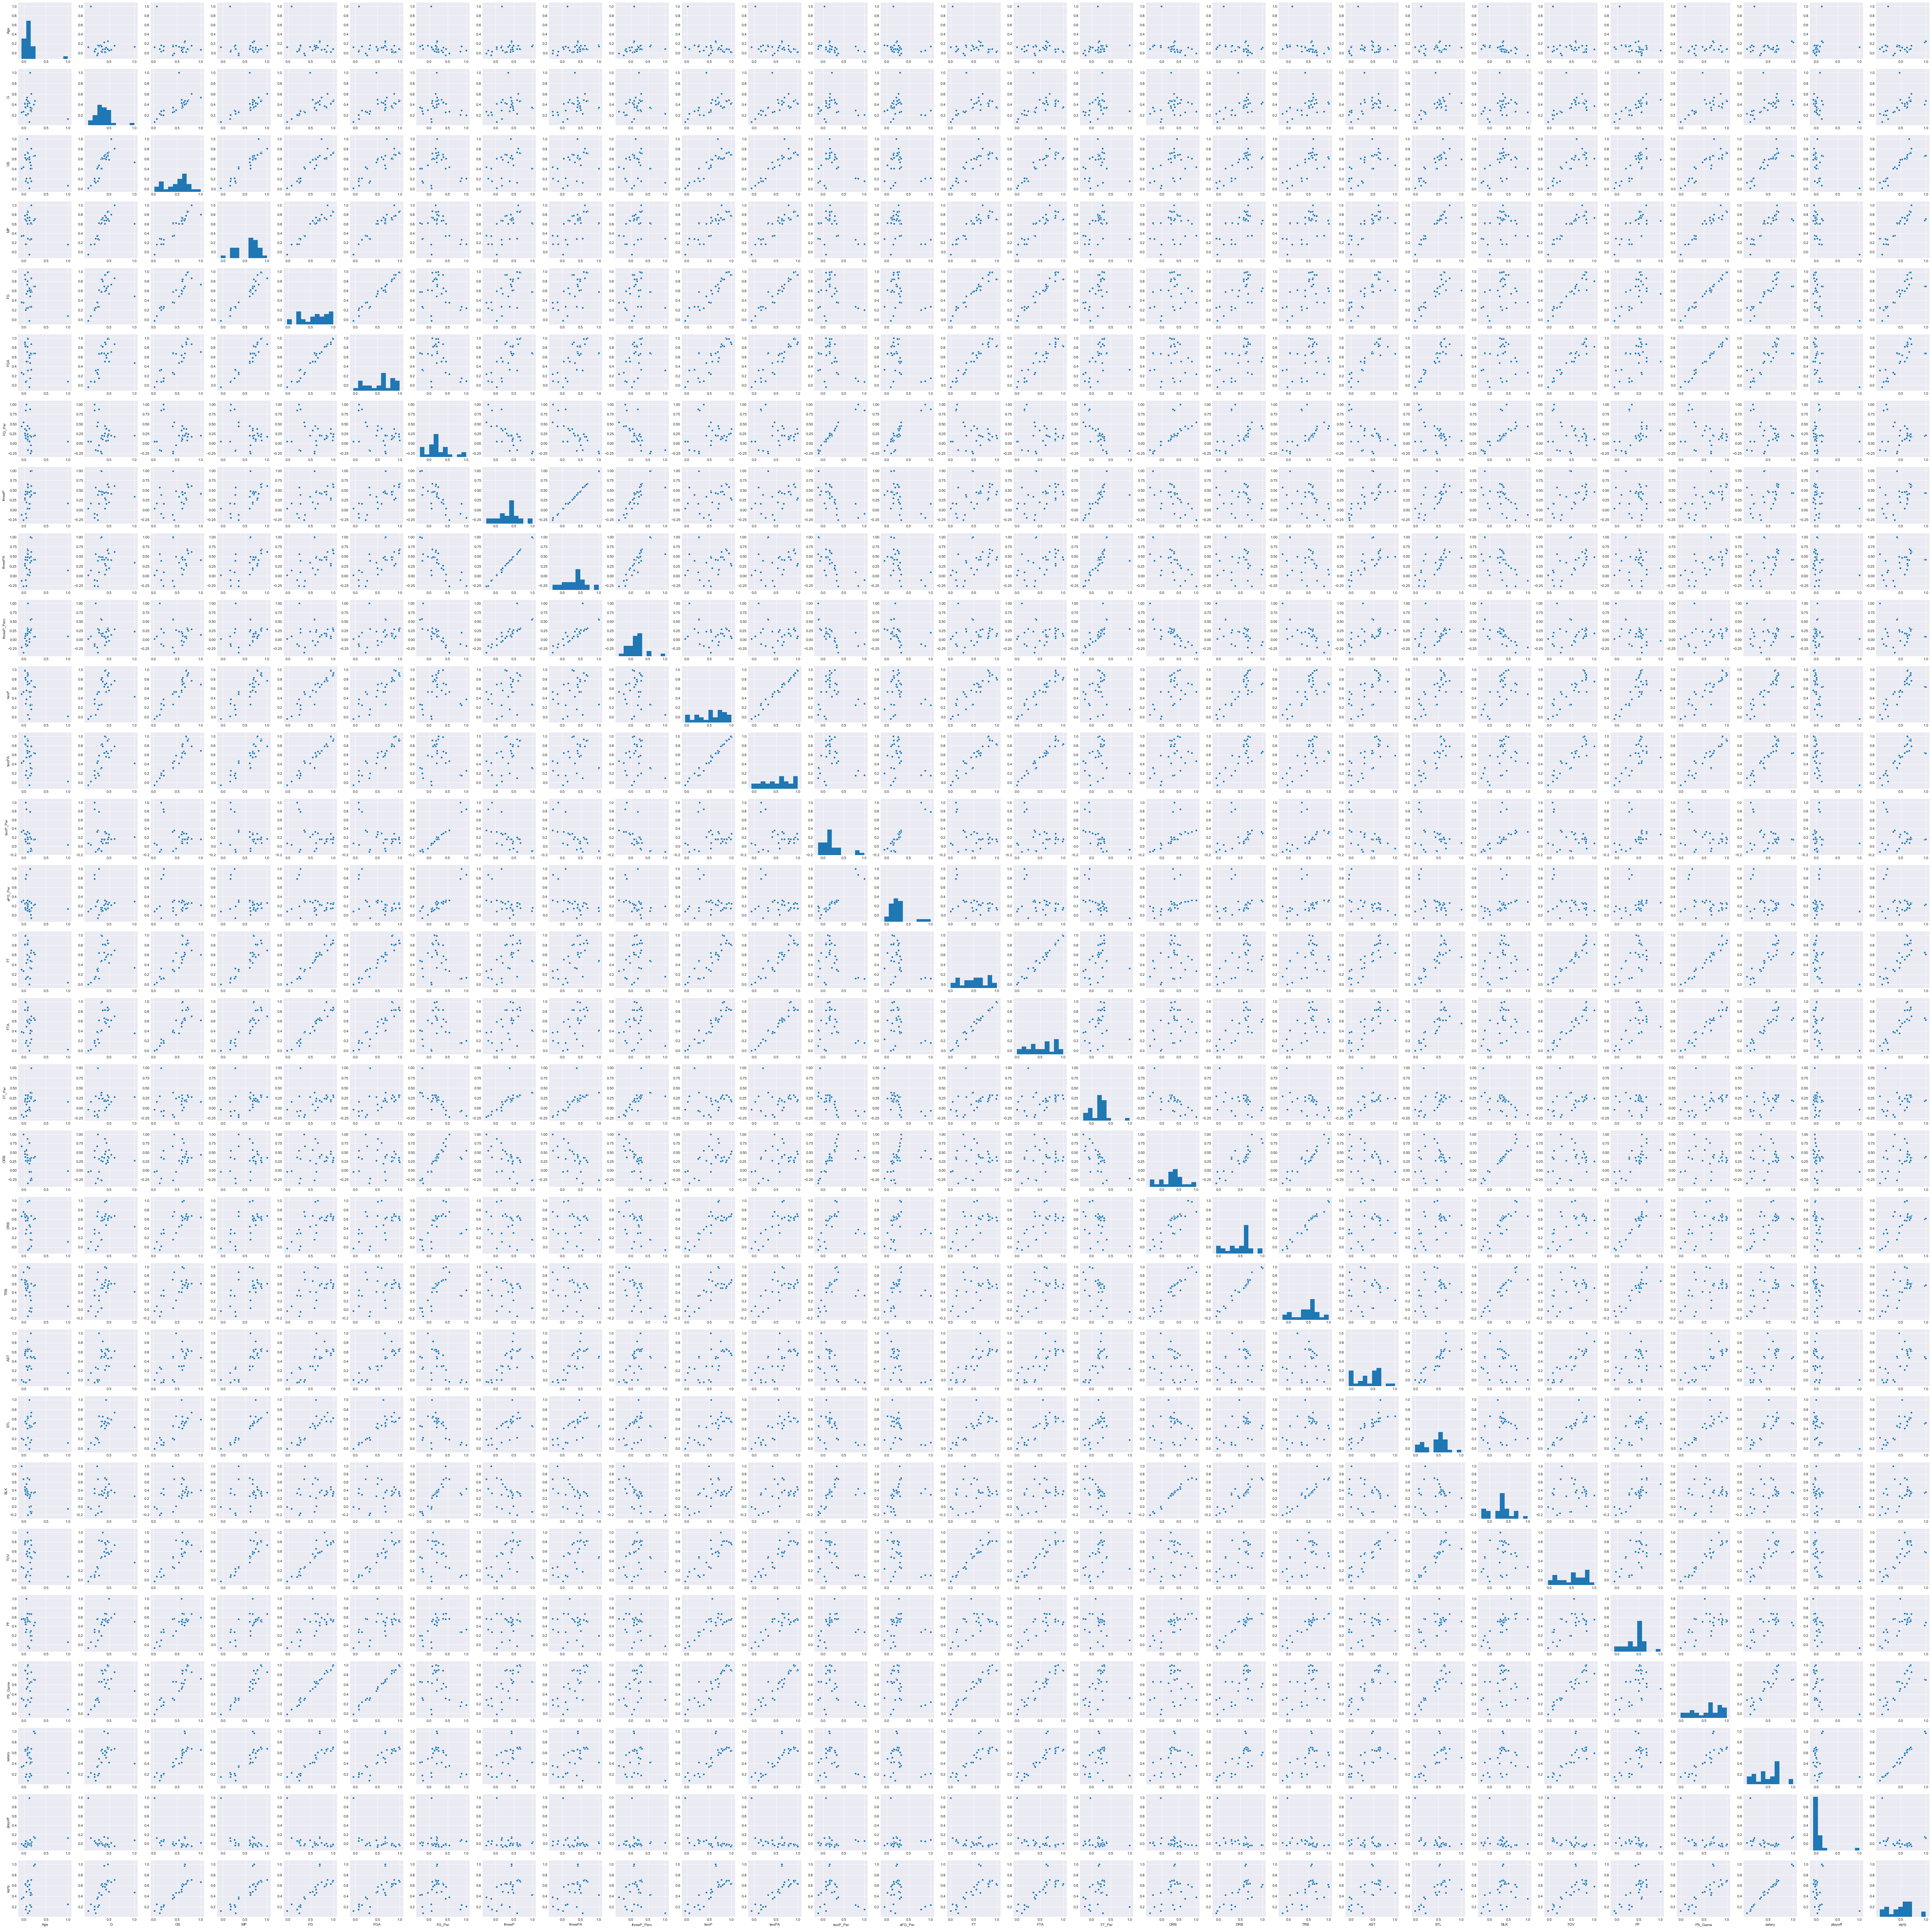

In [27]:
sns.pairplot(nba_df.corr())

**jointplot of salary and minutes played (MP)**

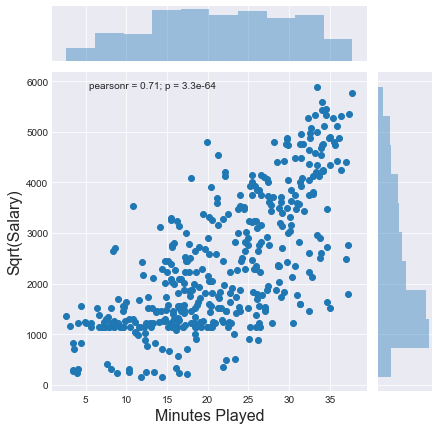

In [28]:
h = sns.jointplot(nba_df.MP, nba_df.sqrty)

# JointGrid has a convenience function
h.set_axis_labels('Minutes Played', 'Sqrt(Salary)', fontsize=16)


#h.suptitle('Minutes Played Vs. Sqrt(Salary)', fontsize=16)

h.savefig('MinutesPlayedVsSqrtSalary.png')

Minutes played shows a pearsonR of 0.71. there is a trend showing that higher salaries are given to players who are going to be playing a lot. This intuitively makes sense considering these are the players that the teams rely on 

**jointplot of salary and points per game (PS_Game)**

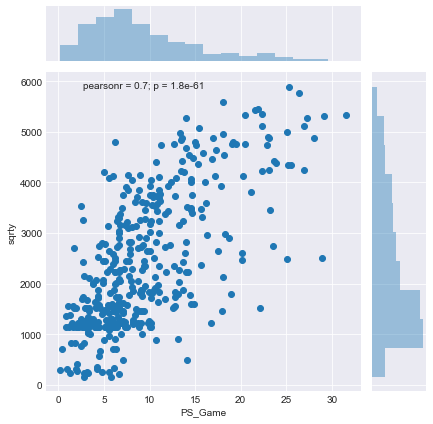

In [29]:
sns.jointplot(nba_df.PS_Game, nba_df.sqrty)

plt.show()

points per game shows a pearsonR of 0.7. there is a trend showing that higher salaries are given to players who score a lot of points per game.  makes sense!

**jointplot of salary and age (Age)**

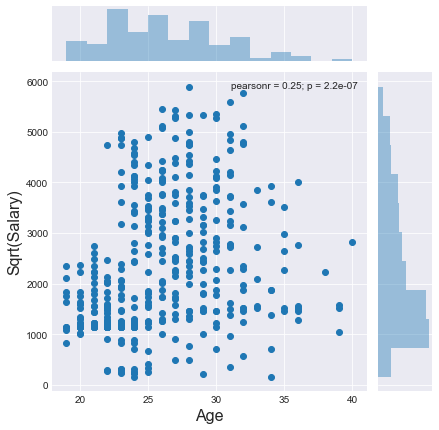

In [53]:
g = sns.jointplot(nba_df.Age, nba_df.sqrty)

g.set_axis_labels('Age', 'Sqrt(Salary)', fontsize=16)


#h.suptitle('Minutes Played Vs. Sqrt(Salary)', fontsize=16)

g.savefig('AgeVsSqrtSalary.png')

age doesn't show much of a correlation to salary.. this makes sense as it's less about your age but moreso about your skil level and the stats you producs

**let's see how position affects salary**

In [31]:
#let's do one quick datapoint change 
nba_df.loc[nba_df['Pos'] == 'PF-C', "Pos"] = 'C'

[Text(0,0.5,'Sqrt(Salary)'),
 Text(0.5,0,'Position'),
 Text(0.5,1,'Sqrt(Salary) by Position')]

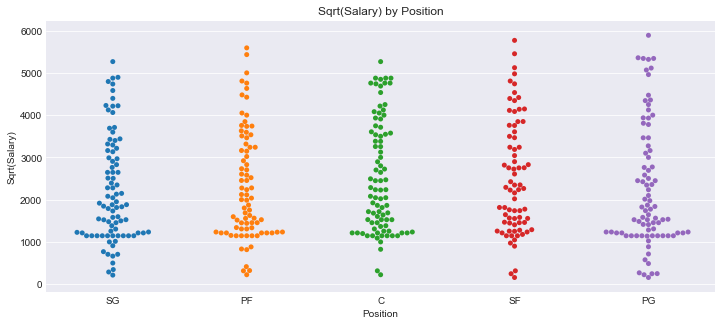

In [51]:
z = fig, ax = plt.subplots(figsize=(12,5))
z = sns.swarmplot(nba_df.Pos, nba_df.sqrty, edgecolor='white')
#ax.set_yticklabels(['$0', '$5,000,000', '$10,000,000', '$15,000,000', '$20,000,000', '$25,000,000', '$30,000,000', '$35,000,000'])

z.set(xlabel='Position', ylabel='Sqrt(Salary)', title ='Sqrt(Salary) by Position')


out of all positions, the highest paid players are point guards  
relatively, fewer SF, C, PF make the minimal amount compared to PG and SG

**look at how much money different teams spends on players**

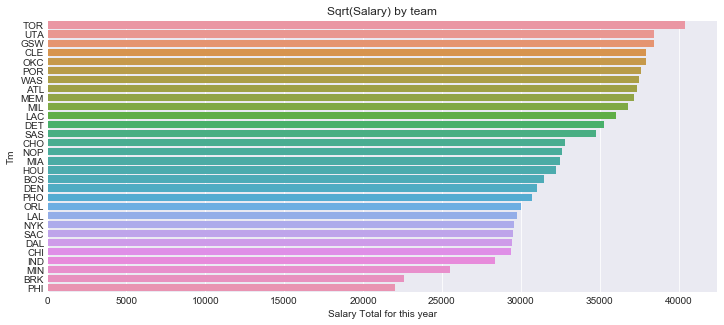

In [55]:
team_sals = nba_df.groupby("Tm").agg(np.sum).sort_values('sqrty', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(x=team_sals.sqrty, y=team_sals.Tm, ax=ax)

ax.set_xlabel('Salary Total for this year')
ax.set_title('Sqrt(Salary) by team')
plt.show()

**see if playoff has any effect on salary**

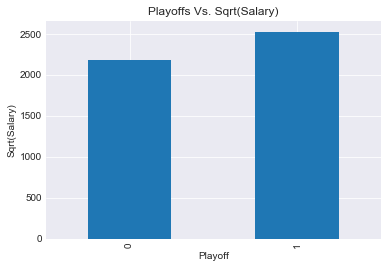

In [56]:
playoff_df = nba_df.groupby("playoff")
salaryp_df = playoff_df.sqrty.mean()
salaryp_df.plot(kind ='bar')

plt.title("Playoffs Vs. Sqrt(Salary)")
plt.xlabel("Playoff")
plt.ylabel("Sqrt(Salary)")

plt.savefig('PlayoffVsSqrtSalary.png')

there is a slight increase in salary if the player made the playoffs the previous year!